In [2]:
#import pandas library 
import pandas as pd

In [3]:
df=pd.read_csv('/kaggle/input/mall-customer/Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Descriptive Statistics

In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Exploratory Data Analysis- EDA

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

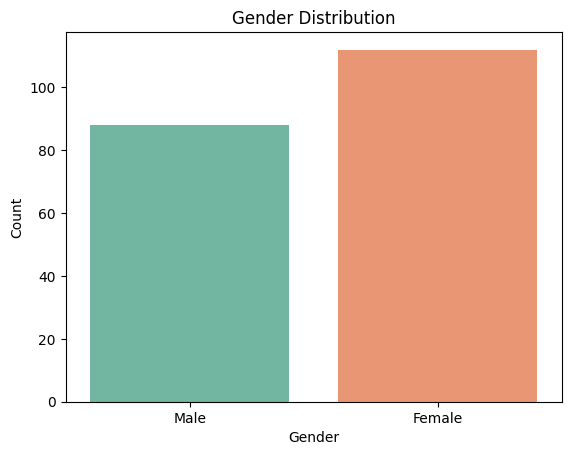

In [10]:
sns.countplot(x='Gender',data=df,palette='Set2')
plt.title('Gender Distribution')
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


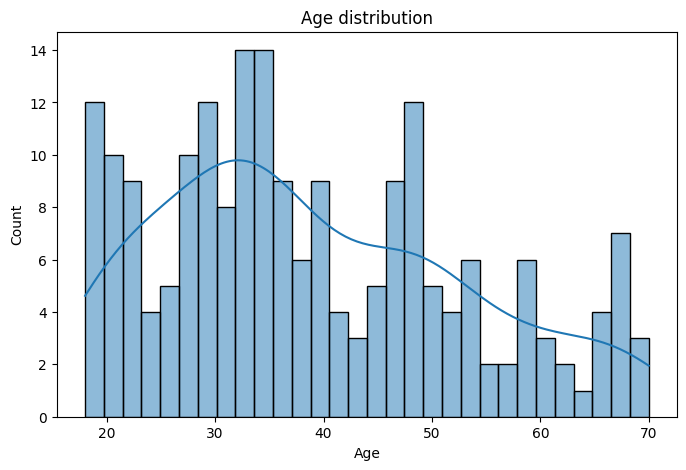

In [13]:
plt.figure(figsize=(8,5))
sns.histplot(x='Age',data=df,bins=30,kde=True)
plt.title("Age distribution")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


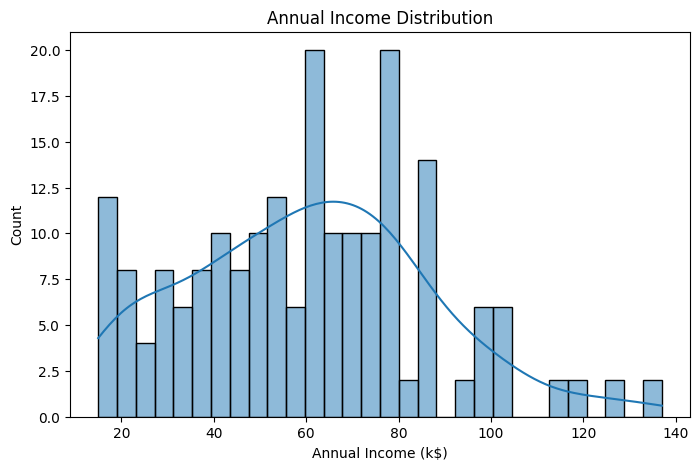

In [17]:
plt.figure(figsize=(8,5))
sns.histplot(x=df['Annual Income (k$)'],data=df,bins=30,kde=True)
plt.title("Annual Income Distribution")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


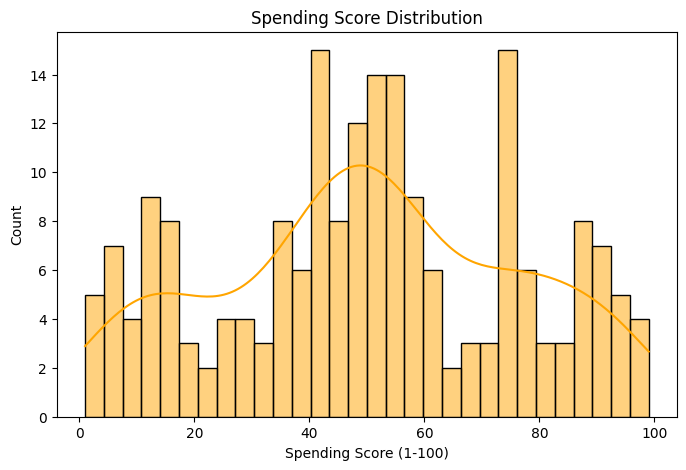

In [22]:
plt.figure(figsize=(8,5))
sns.histplot(x='Spending Score (1-100)',data=df,bins=30,color='orange',kde=True)
plt.title("Spending Score Distribution")
plt.show()

In [31]:
import warnings

warnings.filterwarnings("ignore")

<Figure size 1600x1600 with 0 Axes>

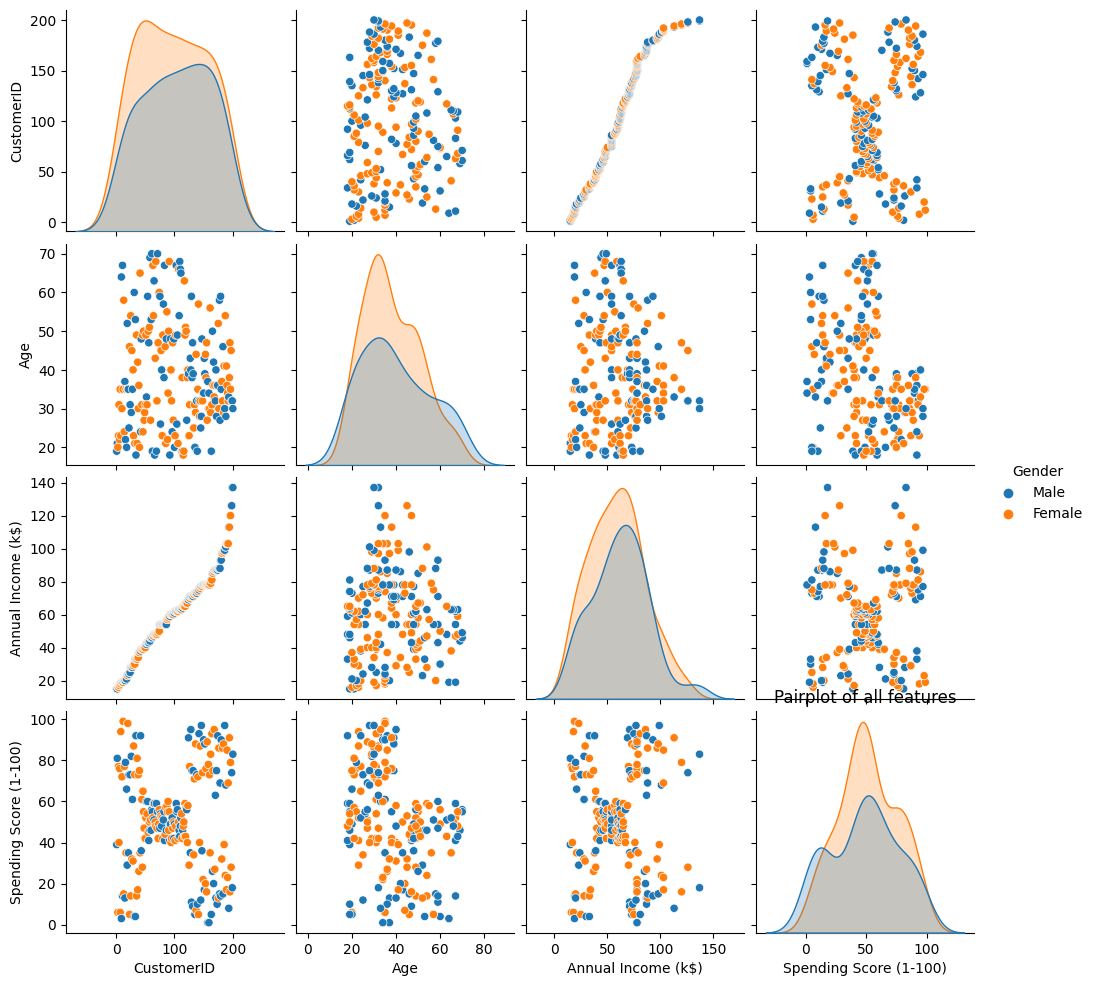

In [32]:
plt.figure(figsize=(16,16))
sns.pairplot(df,hue='Gender')
plt.title('Pairplot of all features')
plt.show()

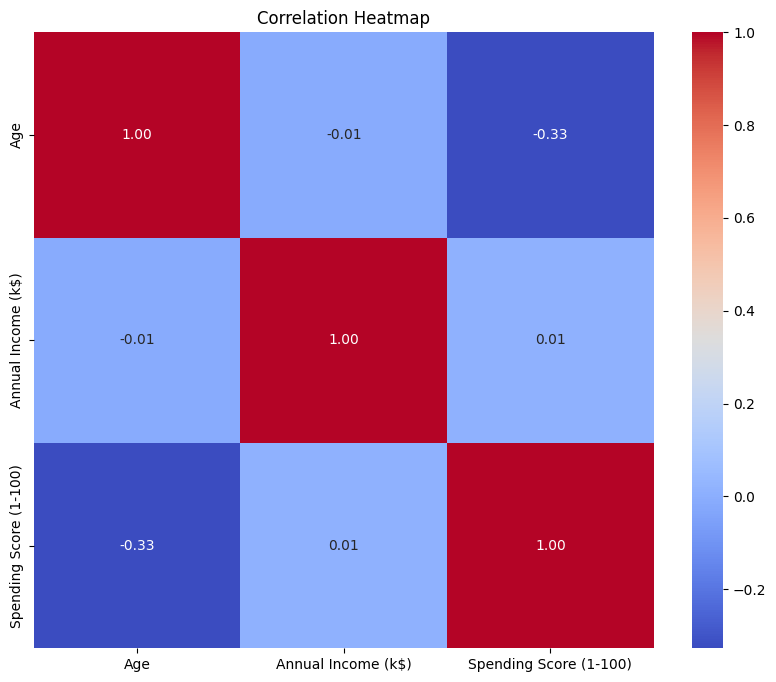

In [35]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.iloc[:,2:5].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


Encode Categorical Variable

In [36]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

In [39]:
df.iloc[:,1]=LE.fit_transform(df.iloc[:,1])

In [40]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


Handling Outliers

In [53]:
def handling_outliers(dataset):
    for column in dataset.select_dtypes(include=['float64', 'int64']).columns:
        quantile_25 = dataset[column].quantile(0.25)
        quantile_75 = dataset[column].quantile(0.75)
        iqr = quantile_75 - quantile_25
        lower_percentile = quantile_25 - 1.5 * iqr
        upper_percentile = quantile_75 + 1.5 * iqr

        # Filter out outliers
        dataset = dataset[(dataset[column] >= lower_percentile) & (dataset[column] <= upper_percentile)]

    return dataset


In [54]:
df2=handling_outliers(df)
df2

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
193,194,0,38,113,91
194,195,0,47,120,16
195,196,0,35,120,79
196,197,0,45,126,28


In [66]:
X=df.iloc[:,3:5].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

Feature Scaling

In [67]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [68]:
X=sc.fit_transform(X)


In [69]:
X

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

Determine the Optimal Number of Clusters

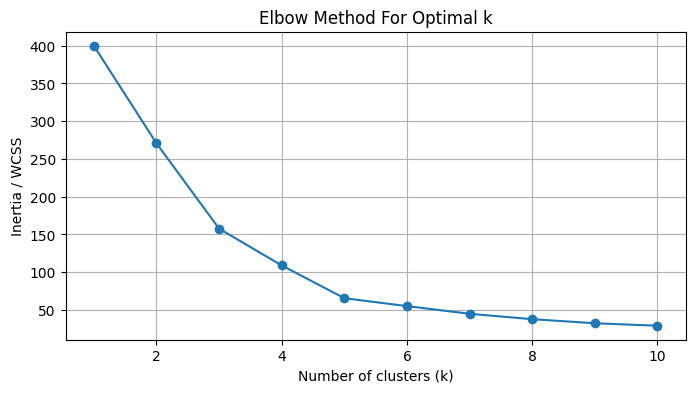

In [70]:
# use elbow method

from sklearn.cluster import KMeans

inertia=[]

for k in range(1,11):
    kmeans=KMeans(n_clusters=k,random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)


# Plot the Elbow Curve
plt.figure(figsize=(8,4))
plt.plot(range(1,11), inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia / WCSS')
plt.grid(True)
plt.show()


array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [71]:
#we are taking k=5

kmeans=KMeans(n_clusters=5,random_state=0)
model=kmeans.fit(X)


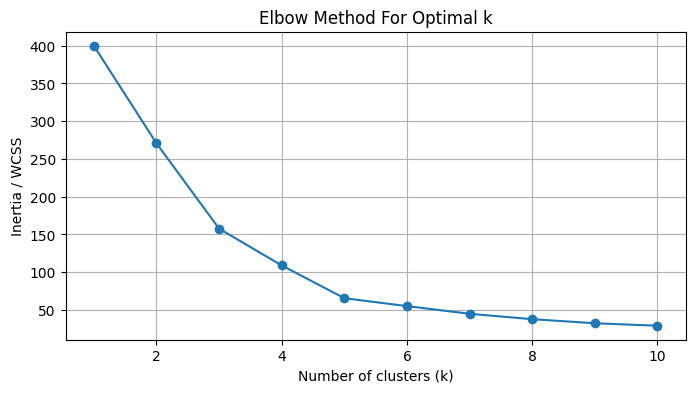

In [72]:
# Plot the Elbow Curve
plt.figure(figsize=(8,4))
plt.plot(range(1,11), inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia / WCSS')
plt.grid(True)
plt.show()

In [73]:
y_pred=model.predict(X)
y_pred

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

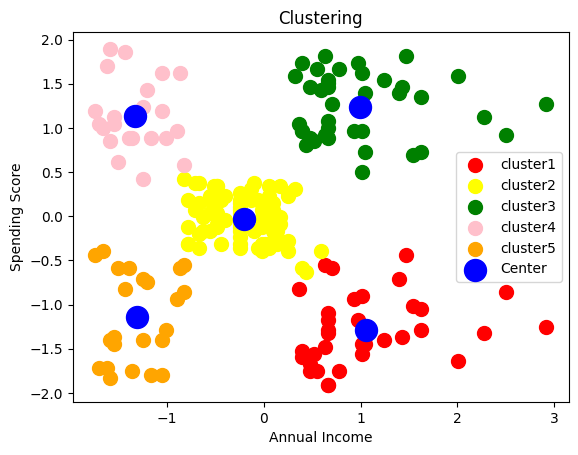

In [74]:
plt.scatter(X[y_pred==0,0],X[y_pred==0,1],s=100,c='red',label='cluster1')
plt.scatter(X[y_pred==1,0],X[y_pred==1,1],s=100,c='yellow',label='cluster2')
plt.scatter(X[y_pred==2,0],X[y_pred==2,1],s=100,c='green',label='cluster3')
plt.scatter(X[y_pred==3,0],X[y_pred==3,1],s=100,c='pink',label='cluster4')
plt.scatter(X[y_pred==4,0],X[y_pred==4,1],s=100,c='orange',label='cluster5')

plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s=250,c='blue',label='Center')
plt.title('Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

Great! Based on your final cluster image in the **Mall Customer Segmentation** project, let’s design **custom marketing strategies** for each cluster.

Assumption: You're using KMeans with 5 clusters based on `Annual Income` and `Spending Score` (possibly standardized). From the plot:

---

## 💼 Cluster Profiles & Marketing Strategies

| Cluster                | Income Level | Spending Behavior | Description                | Marketing Strategy                                                                                                                                             |
| ---------------------- | ------------ | ----------------- | -------------------------- | -------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Cluster 1 (Red)**    | High         | Low               | **Wealthy but Disengaged** | - Offer **exclusive premium services** to attract their attention<br>- Use **personalized emails** or **VIP events**<br>- Focus on **luxury brand** promotions |
| **Cluster 2 (Yellow)** | Medium       | Medium            | **Average Customers**      | - Send regular offers<br>- Loyalty rewards for frequent purchases<br>- Encourage referrals                                                                     |
| **Cluster 3 (Green)**  | High         | High              | **High Value Customers**   | - Retain with **loyalty programs**, early access to sales<br>- Upsell premium products<br>- Collect feedback to keep them engaged                              |
| **Cluster 4 (Orange)** | Low          | Low               | **Low Value Segment**      | - Avoid heavy ad spend<br>- Push **basic discounts**, budget bundles<br>- Promote low-cost options                                                             |
| **Cluster 5 (Pink)**   | Low          | High              | **Impulse/Value Seekers**  | - Send **flash sale alerts** and **limited-time offers**<br>- Emphasize emotional or social value<br>- Optimize for mobile experience (quick purchase flow)    |

---

##  Action Plan per Cluster

###  Cluster 1: "Affluent but Disengaged"

* **Challenge**: They're rich but don’t spend much.
* **Strategy**: Make them feel exclusive. Push status-based products (e.g., luxury watches, elite memberships).

---

###  Cluster 2: "Steady Spenders"

* **Strategy**: Build loyalty over time. They're consistent but not extreme.
* Offer cashbacks or reward points to encourage more engagement.

---

###  Cluster 3: "Best Customers (High Income & Spending)"

* **Strategy**: Retention is key.
* Give early access to new products, premium plans, top-tier loyalty programs.

---

###  Cluster 4: "Low Engagement Segment"

* **Strategy**: Minimal investment.
* Only advertise during festive sales or clearance events.

---

###  Cluster 5: "Budget Shoppers Who Love to Spend"

* **Strategy**: Promote trending items under ₹999 / \$10 / ₹199 offers.
* They respond well to urgency, social proof, and discounts.

---
